In [1]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

import tensorflow as tf

import random

2022-09-10 11:07:37.506216: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Normalize the data
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

# Category to one hot encoding
categories = y_train.max() - y_train.min() + 1

y_train = np.eye(categories)[y_train]
y_test = np.eye(categories)[y_test]

In [4]:
# Create a list of human redable categories
human_category = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandals", "Shirt", "Sneaker", "Bag", "Ankle boots"]

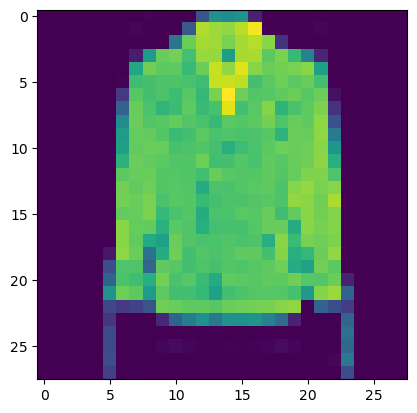

categoty: Coat


In [5]:
# Display a random element of the dataset
element = random.randint(0, len(x_train) - 1)

plt.imshow(x_train[element])
plt.show()

# Print the label
print(f"categoty: {human_category[y_train[element].argmax()]}")


In [6]:
# Define the model
model = keras.Sequential()

# Input
model.add(layers.Flatten())

# Hidden
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(128, activation="relu"))


# Output
model.add(layers.Dense(categories, activation="softmax"))


# Compile the model
learning_rate = 0.01

model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

2022-09-10 11:07:39.667307: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-10 11:07:39.667933: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-09-10 11:07:39.683441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-10 11:07:39.683604: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:26:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.83GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2022-09-10 11:07:39.683621: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-09-10 11:07:39.684804: I tensorflow/stream_executor/platform/def

In [7]:
# Train and evaluate the model 
batch_size = 32
epochs = 10

model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)


# Evaluate
print("\nevaluation: \n")
model.evaluate(x_test, y_test)

2022-09-10 11:07:40.399501: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-09-10 11:07:40.399832: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3999890000 Hz


Epoch 1/20
   1/1875 [..............................] - ETA: 14:03 - loss: 2.3302 - accuracy: 0.1562

2022-09-10 11:07:40.690092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1875/1875 [==============================] - 2s 1ms/step - loss: 0.6705 - accuracy: 0.7580
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4540 - accuracy: 0.8383
Epoch 3/20
1875/1875 [==============================] - 2s 973us/step - loss: 0.4222 - accuracy: 0.8525
Epoch 4/20
1875/1875 [==============================] - 2s 950us/step - loss: 0.4012 - accuracy: 0.8566
Epoch 5/20
1875/1875 [==============================] - 2s 947us/step - loss: 0.4021 - accuracy: 0.8575
Epoch 6/20
1875/1875 [==============================] - 2s 910us/step - loss: 0.3913 - accuracy: 0.8598
Epoch 7/20
1875/1875 [==============================] - 2s 937us/step - loss: 0.3898 - accuracy: 0.8587
Epoch 8/20
1875/1875 [==============================] - 2s 993us/step - loss: 0.3786 - accuracy: 0.8654
Epoch 9/20
1875/1875 [==============================] - 2s 932us/step - loss: 0.3892 - accuracy: 0.8612
Epoch 10/20
1875/1875 [==============================] - 2s 921us/step - loss: 

[0.45376572012901306, 0.847100019454956]

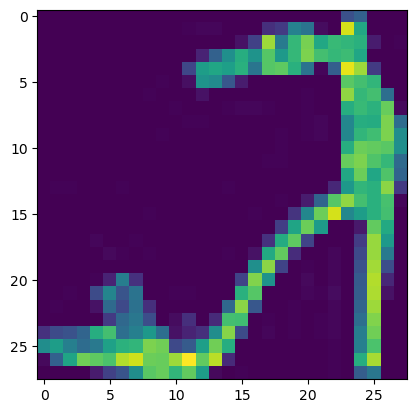

predicted: Sandals
real: Sandals


In [66]:
# Make prediction on the test dataset
# Select a random element from the test dataset
element = random.randint(0, len(x_test) - 1)

plt.imshow(x_test[element])
plt.show()


# Make prediction
pred_category = model.predict(x_test[element].reshape(1, 28, 28))
pred_category = pred_category.argmax()
# Get the real value
real_categoty = y_test[element].argmax()


print(f"predicted: {human_category[pred_category]}\nreal: {human_category[real_categoty]}")